In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Load the data
data = pd.read_excel('data/ATPhiring.xlsx', sheet_name='2007-2024')

# Melt the dataframe to have a long format
melted_data = pd.melt(data, id_vars=['Year', 'Airline'], value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                      var_name='Month', value_name='Count')

# Create a 'Date' column by combining 'Year' and 'Month'
melted_data['Date'] = pd.to_datetime(melted_data['Year'].astype(str) + '-' + melted_data['Month'] + '-01')

# Select only the required columns
pivoted_data = melted_data[['Airline', 'Date', 'Count']]

# Fill missing values with 0
pivoted_data = pivoted_data.fillna(0)

# Aggregate the totals for each airline for each year
yearly_totals = melted_data.groupby(['Year', 'Airline'])['Count'].sum().reset_index()

# Pivot the data to have years as index and airlines as columns
pivot_table = yearly_totals.pivot(index='Year', columns='Airline', values='Count')

# Create the plotly figure
fig = px.line(yearly_totals, x='Year', y='Count', color='Airline', title='Yearly Hiring Trends by Airline')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Count',
    legend_title='Airline',
    legend=dict(
        x=1.05,
        y=1,
        traceorder='normal',
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(0,0,0,0)'
    ),
    width=1600,
    height=600
)

# Save to html file
fig.write_html('airline_hiring_trends.html')

# Show the plot
fig.show()

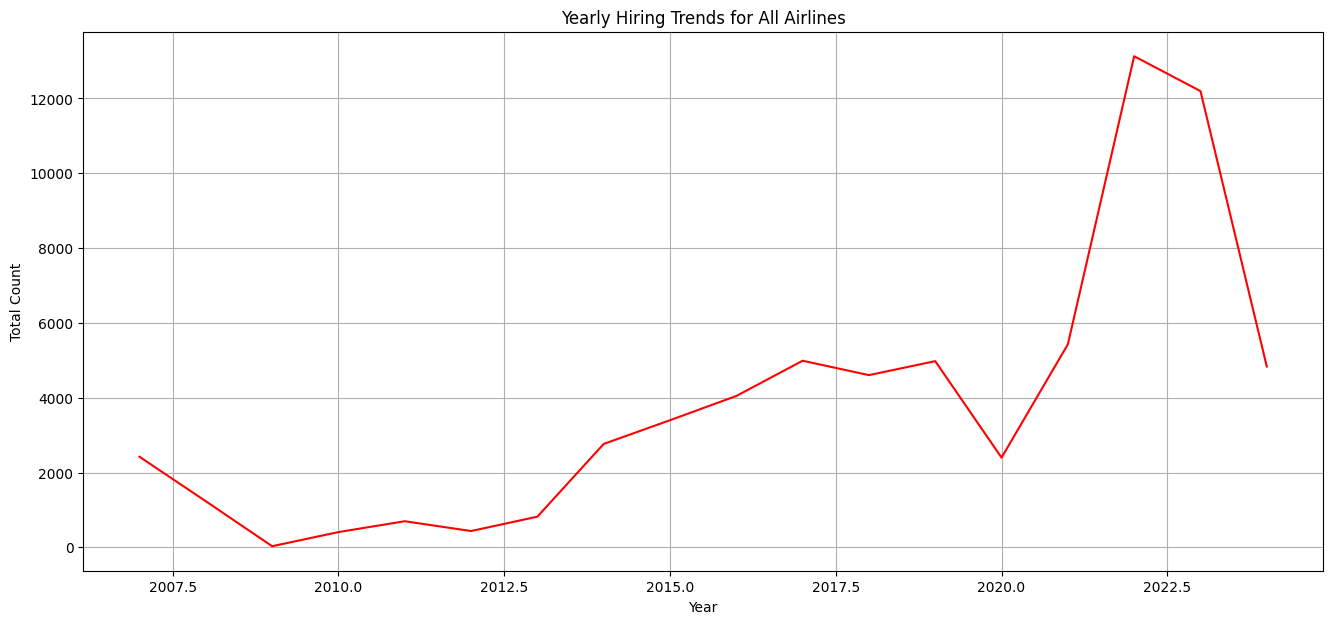

In [5]:
# Create a graph for the yearly totals for all airlines
yearly_totals.groupby('Year')['Count'].sum().plot(kind='line', figsize=(16, 7), color='red')
plt.title('Yearly Hiring Trends for All Airlines')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.grid(True)

# Save the plot to an image
plt.savefig('yearly_hiring_trends_all.png')

plt.show()

In [6]:
# Read the 'Certificates by year' sheet of 'data/ATP_certificate_stats.xlsx' into a dataframe
certificates = pd.read_excel('data/ATP_certificate_stats.xlsx', sheet_name='Certificates by year')

# Transform the certificates DataFrame to have 'Year' as a column
certificates_long = certificates.melt(var_name='Year', value_name='Total')

# Create a graph showing the number of certificates issued each year
fig = px.bar(certificates_long, x='Year', y='Total', title='Number of Certificates Issued Each Year')
fig.update_layout(xaxis_title='Year', yaxis_title='Total Certificates Issued')

# Save the plot to an html file
fig.write_html('certificates_issued_each_year.html')

fig.show()

In [7]:
# Read the 'Certificates by age group' sheet of 'data/ATP_certificate_stats.xlsx' into a dataframe
age_groups = pd.read_excel('data/ATP_certificate_stats.xlsx', sheet_name='Certificates by age group')

# Graph the number of certificates issued for each age group
fig = px.bar(age_groups, x='Age Group', y='Airline Transport 1/', title='Number of Certificates Issued for Each Age Group')
fig.update_layout(xaxis_title='Age Group', yaxis_title='Total Certificates Issued')

# Save the plot to an html file
fig.write_html('certificates_issued_age_group.html')

fig.show()

# Conclusions

Several key points emerge about the future of ATP (Airline Transport Pilot) hiring:

## 1. Recent Hiring Surge, Followed by a Slight Correction
The airline‐by‐airline hiring chart shows a pronounced spike in total hires around the 2020–2022 period. That surge likely reflects a combination of post‐pandemic demand recovery, pent‐up recruiting needs, and anticipated retirements. Although some airlines appear to taper off slightly in 2023–2024, most remain above pre‐2018 hiring baselines, suggesting that the industry has not simply returned to its “old normal” but is instead settling at a relatively higher hiring rate.

## 2. High Proportion of Older Certificate Holders
The bar chart by age group shows a large contingent of certificate holders in the 50–59 and 60–64 brackets. This clustering of older pilots underscores that a sizable wave of retirements is imminent—an important factor keeping hiring demand elevated. Once these pilots begin to retire in significant numbers, it will create additional staffing gaps, even if total air travel growth plateaus.

## 3. Historic High in Pilot Certificate Issuance
The long‐term chart of certificates issued each year indicates that overall pilot certificates (including ATPs) are at or near an all‐time high. This suggests that more people are entering the pilot pipeline than in decades past. However, even with this record‐setting influx, the retirement trend from the older age groups likely means that near‐ to medium‐term replacement needs will remain strong.

## Overall Hiring Outlook
Given the post‐pandemic demand recovery, anticipated retirements of a disproportionately large cohort of current captains, and the continued expansion of regional and low‐cost carriers, the long‐term outlook remains favorable for aspiring airline pilots. While there may be year‐to‐year fluctuations—particularly if economic cycles slow travel demand—structural factors (demographics, retirements, and continued growth in commercial aviation) suggest sustained hiring pressure for years to come.

# Worldwide Business Jet Shipments by Manufacturer (1996-2023)

In [8]:
# Read the 'data/1.03-a-General-Aviation-Aircraft-Shipments-and-Billings-BusinessJets-1996-2023-2024-04-25.xlsx' file into a dataframe
aircraft_data = pd.read_excel('data/1.03-a-General-Aviation-Aircraft-Shipments-and-Billings-BusinessJets-1996-2023-2024-04-25.xlsx', sheet_name='1.3a', skiprows=1)

aircraft_data.columns = ['Make', 'Model'] + list(aircraft_data.columns[2:])

# Forward fill the missing values in the 'Make' column
aircraft_data['Make'] = aircraft_data['Make'].ffill()

# Drop rows where 'Model' is missing
aircraft_data = aircraft_data.dropna(subset=['Model'])

# Drop the last two rows
aircraft_data = aircraft_data[:-2]

# Melt the dataframe to have a long format
aircraft_data_long = aircraft_data.melt(id_vars=['Make', 'Model'], var_name='Year', value_name='Shipments')

# Replace `-` with 0 in the 'Shipments' column
aircraft_data_long['Shipments'] = aircraft_data_long['Shipments'].replace('-', 0)

# Replace missing values with 0 in the 'Shipments' column
aircraft_data_long['Shipments'] = aircraft_data_long['Shipments'].fillna(0)

# Convert the 'Year' column to numeric
aircraft_data_long['Year'] = pd.to_numeric(aircraft_data_long['Year'], errors='coerce')

# Sort the data by 'Year'
aircraft_data_long = aircraft_data_long.sort_values('Year')

# Create a list of unique manufacturers
manufacturers = aircraft_data_long['Make'].unique()

# Create a figure
fig = go.Figure()

# Add traces for each manufacturer and model
for manufacturer in manufacturers:
    models = aircraft_data_long[aircraft_data_long['Make'] == manufacturer]['Model'].unique()
    for model in models:
        filtered_data = aircraft_data_long[(aircraft_data_long['Make'] == manufacturer) & (aircraft_data_long['Model'] == model)]
        fig.add_trace(go.Scatter(x=filtered_data['Year'], y=filtered_data['Shipments'], mode='lines', name=f"{manufacturer} - {model}", visible=False, showlegend=True))

# Make the first manufacturer's data visible
for trace in fig.data:
    if trace.name.startswith(manufacturers[0]):
        trace.visible = True

# Create dropdown buttons
dropdown_buttons = [
    {'label': manufacturer, 'method': 'update', 'args': [{'visible': [trace.name.startswith(manufacturer) for trace in fig.data]}, {'title': f'Shipments for {manufacturer}'}]}
    for manufacturer in manufacturers
]

# Update layout with dropdown and legend
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
        'x': 1.05,  # Position the dropdown to the right
        'xanchor': 'left',
        'y': 1,
        'yanchor': 'top'
    }],
    xaxis_title='Year',
    yaxis_title='Number of Shipments',
    legend_title='Model',
    legend=dict(
        x=1.05,  # Position the legend to the right
        y=0.8,  # Position the legend a little lower
        traceorder='normal',
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(0,0,0,0)'
    ),
    width=1600,
    height=600
)

# Save the plot to an html file
fig.write_html('bussiness_jet_shipments.html')

# Show the plot
fig.show()

/var/folders/8y/0ldkfh015gjc7lvpvxd7pr380000gn/T/ipykernel_75599/524247609.py:19: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [11]:
# Group by 'Make' and 'Year', then sum the 'Shipments'
make_yearly_totals = aircraft_data_long.groupby(['Make', 'Year'])['Shipments'].sum().reset_index()

# Create the plotly figure
fig = px.line(make_yearly_totals, x='Year', y='Shipments', color='Make', title='Yearly Shipments by Make')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Shipments',
    legend_title='Make',
    legend=dict(
        x=1.05,
        y=1,
        traceorder='normal',
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(0,0,0,0)'
    ),
    width=1600,
    height=600
)

# Save to html file
fig.write_html('bussiness_jet_yearly_shipments_by_make.html')

# Show the plot
fig.show()

In [12]:
# Group by 'Year' and sum the 'Shipments'
yearly_totals_aircraft = aircraft_data_long.groupby('Year')['Shipments'].sum().reset_index()

# Create the plotly figure
fig = px.line(yearly_totals_aircraft, x='Year', y='Shipments', title='Yearly Total Shipments of Aircraft')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Shipments',
    width=1600,
    height=600
)

# Save to html file
fig.write_html('yearly_total_shipments_bussiness_jet.html')

# Show the plot
fig.show()

# Worldwide Turboprop Shipments by Manufacturer (1996-2023)

In [13]:
# Read the 'data/1.03-b-General-Aviation-Aircraft-Shipments-and-Billings-Turboprops-2006-2021-2022-03-18.xlsx' file into a dataframe
aircraft_data = pd.read_excel('data/1.03-b-General-Aviation-Aircraft-Shipments-and-Billings-Turboprops-2006-2021-2022-03-18.xlsx', sheet_name='Sheet1', skiprows=1)

aircraft_data.columns = ['Make', 'Model'] + list(aircraft_data.columns[2:])

# Forward fill the missing values in the 'Make' column
aircraft_data['Make'] = aircraft_data['Make'].ffill()

# Drop rows where 'Model' is missing
aircraft_data = aircraft_data.dropna(subset=['Model'])

# Drop the last two rows
aircraft_data = aircraft_data[:-2]

# Melt the dataframe to have a long format
aircraft_data_long = aircraft_data.melt(id_vars=['Make', 'Model'], var_name='Year', value_name='Shipments')

# Replace `-` with 0 in the 'Shipments' column
aircraft_data_long['Shipments'] = aircraft_data_long['Shipments'].replace('-', 0)

# Replace missing values with 0 in the 'Shipments' column
aircraft_data_long['Shipments'] = aircraft_data_long['Shipments'].fillna(0)

# Convert the 'Year' column to numeric
aircraft_data_long['Year'] = pd.to_numeric(aircraft_data_long['Year'], errors='coerce')

# Sort the data by 'Year'
aircraft_data_long = aircraft_data_long.sort_values('Year')

# Create a list of unique manufacturers
manufacturers = aircraft_data_long['Make'].unique()

# Create a figure
fig = go.Figure()

# Add traces for each manufacturer and model
for manufacturer in manufacturers:
    models = aircraft_data_long[aircraft_data_long['Make'] == manufacturer]['Model'].unique()
    for model in models:
        filtered_data = aircraft_data_long[(aircraft_data_long['Make'] == manufacturer) & (aircraft_data_long['Model'] == model)]
        fig.add_trace(go.Scatter(x=filtered_data['Year'], y=filtered_data['Shipments'], mode='lines', name=f"{manufacturer} - {model}", visible=False, showlegend=True))

# Make the first manufacturer's data visible
for trace in fig.data:
    if trace.name.startswith(manufacturers[0]):
        trace.visible = True

# Create dropdown buttons
dropdown_buttons = [
    {'label': manufacturer, 'method': 'update', 'args': [{'visible': [trace.name.startswith(manufacturer) for trace in fig.data]}, {'title': f'Shipments for {manufacturer}'}]}
    for manufacturer in manufacturers
]

# Update layout with dropdown and legend
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
        'x': 1.05,  # Position the dropdown to the right
        'xanchor': 'left',
        'y': 1,
        'yanchor': 'top'
    }],
    xaxis_title='Year',
    yaxis_title='Number of Shipments',
    legend_title='Model',
    legend=dict(
        x=1.05,  # Position the legend to the right
        y=0.8,  # Position the legend a little lower
        traceorder='normal',
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(0,0,0,0)'
    ),
    width=1600,
    height=600
)

# Save the plot to an html file
fig.write_html('turboprops_shipments.html')

# Show the plot
fig.show()

/var/folders/8y/0ldkfh015gjc7lvpvxd7pr380000gn/T/ipykernel_75599/163689439.py:19: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [14]:
# Group by 'Make' and 'Year', then sum the 'Shipments'
make_yearly_totals = aircraft_data_long.groupby(['Make', 'Year'])['Shipments'].sum().reset_index()

# Create the plotly figure
fig = px.line(make_yearly_totals, x='Year', y='Shipments', color='Make', title='Yearly Shipments by Make')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Shipments',
    legend_title='Make',
    legend=dict(
        x=1.05,
        y=1,
        traceorder='normal',
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(0,0,0,0)'
    ),
    width=1600,
    height=600
)

# Save to html file
fig.write_html('turboprops_yearly_shipments_by_make.html')

# Show the plot
fig.show()

In [15]:
# Group by 'Year' and sum the 'Shipments'
yearly_totals_aircraft = aircraft_data_long.groupby('Year')['Shipments'].sum().reset_index()

# Create the plotly figure
fig = px.line(yearly_totals_aircraft, x='Year', y='Shipments', title='Yearly Total Shipments of Aircraft')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Shipments',
    width=1600,
    height=600
)

# Save to html file
fig.write_html('yearly_total_shipments_turboprops.html')

# Show the plot
fig.show()